In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Log returns

In [ ]:
symbol = 'GOOG'
df = yf.download(symbol, start="2023-01-01", end="2023-01-08")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,89.830002,91.550003,89.019997,89.699997,89.699997,20738500
2023-01-04,91.010002,91.239998,87.800003,88.709999,88.709999,27046500
2023-01-05,88.070000,88.209999,86.559998,86.769997,86.769997,23136100
2023-01-06,87.360001,88.470001,85.570000,88.160004,88.160004,26612600


In [ ]:
# single-period percentage returns
returns = df.Close.pct_change()
returns

Date
2023-01-03         NaN
2023-01-04   -0.011037
2023-01-05   -0.021869
2023-01-06    0.016019
Name: Close, dtype: float64

In [ ]:
# terminal return
terminal_return = df.Close[-1]/df.Close[0] - 1
terminal_return

-0.01716826464354737

In [ ]:
# cumulative returns
cum_returns = (1+returns).cumprod() - 1
cum_returns

Date
2023-01-03         NaN
2023-01-04   -0.011037
2023-01-05   -0.032664
2023-01-06   -0.017168
Name: Close, dtype: float64

In [ ]:
# check equality on terminal return
cum_returns.values[-1] == terminal_return

True

In [ ]:
# log returns (1+R format)
log_returns = np.log(1+returns)
log_returns

Date
2023-01-03         NaN
2023-01-04   -0.011098
2023-01-05   -0.022112
2023-01-06    0.015892
Name: Close, dtype: float64

In [ ]:
# get cumulative returns using log returns
cum_return2 = np.exp(log_returns.cumsum()) - 1
cum_return2

Date
2023-01-03         NaN
2023-01-04   -0.011037
2023-01-05   -0.032664
2023-01-06   -0.017168
Name: Close, dtype: float64

In [ ]:
# check equality on terminal return
cum_return2.values[-1] == terminal_return

True

# Trend following strategy

In [ ]:
symbol = 'AAPL'
df = yf.download(symbol, start="2022-01-01", end="2023-01-01")
df.index = pd.to_datetime(df.index)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.434296,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.144302,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.405685,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.510956,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.679489,86709100


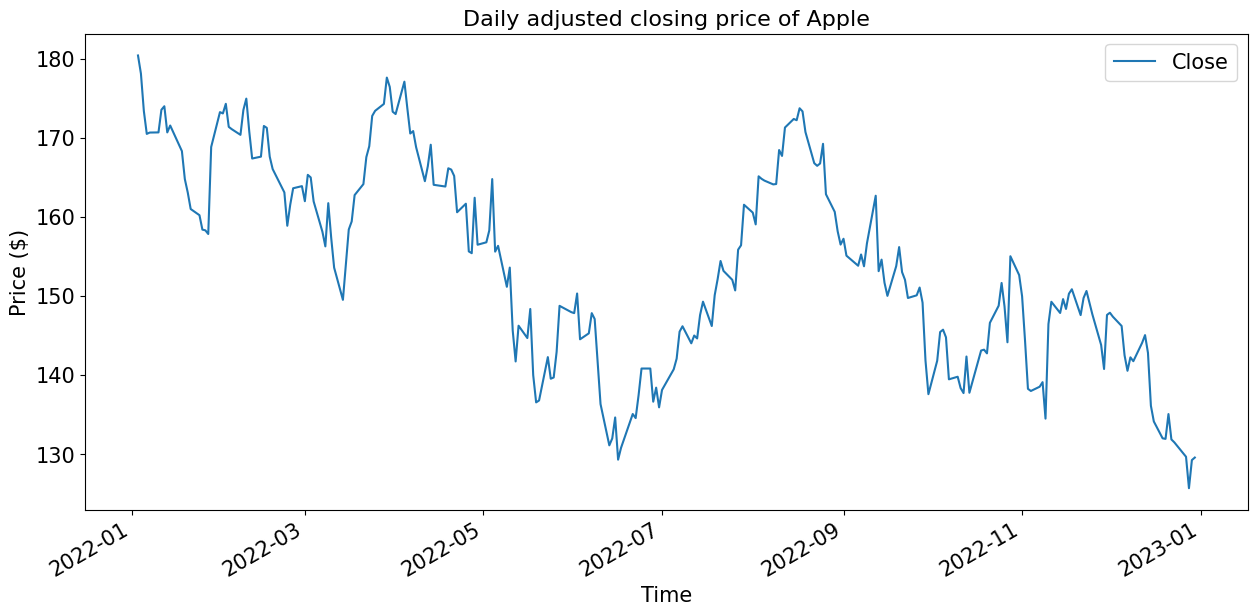

In [ ]:
# plot the adj closing price
plt.figure(figsize=(15, 7))
df['Adj Close'].plot()

# set labels and sizes of the title and axis
plt.title('Daily adjusted closing price of Apple', fontsize=16)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Price ($)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Close'], prop={'size': 15})

# show the plot
plt.show()

# Simple moving average (SMA)

In [ ]:
window = 3
SMA1 = "SMA-"+str(window)
df[SMA1] = df['Adj Close'].rolling(window).mean()
colnames = ["Adj Close",SMA1]
df2 = df[colnames]
df2.head()

,Adj Close,SMA-3
Date,,
2022-01-03,180.434296,NaN
2022-01-04,178.144302,NaN
2022-01-05,173.405685,177.328094
2022-01-06,170.510956,174.020315
2022-01-07,170.679489,171.532043


In [ ]:
# manually verify the first SMA entry
np.mean(df['Adj Close'][:3])

177.32809448242188

In [ ]:
df['New_SMA'] = df['Adj Close'].rolling(window, min_periods=1).mean()
df[colnames + ['New_SMA']].head()

,Adj Close,SMA-3,New_SMA
Date,,,
2022-01-03,180.434296,NaN,180.434296
2022-01-04,178.144302,NaN,179.289299
2022-01-05,173.405685,177.328094,177.328094
2022-01-06,170.510956,174.020315,174.020315
2022-01-07,170.679489,171.532043,171.532043


Text(0, 0.5, 'Price')

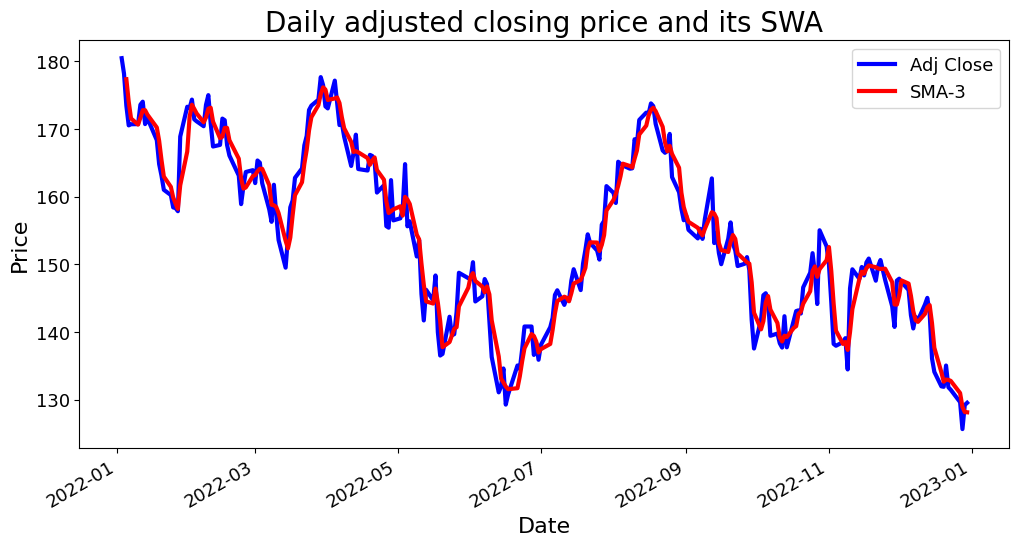

In [ ]:
# colors for the line plot
colors = ['blue', 'red']

# line plot for original price and SMA
df2.plot(color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(labels = colnames, fontsize=13)

# title and labels
plt.title('Daily adjusted closing price and its SWA', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)

In [ ]:
window = 20
SMA2 = "SMA-"+str(window)
df2[SMA2] = df2['Adj Close'].rolling(window).mean()
colnames = ["Adj Close",SMA1,SMA2]

<ipython-input-53-858174e7bd0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[SMA2] = df2['Adj Close'].rolling(window).mean()


Text(0, 0.5, 'Price')

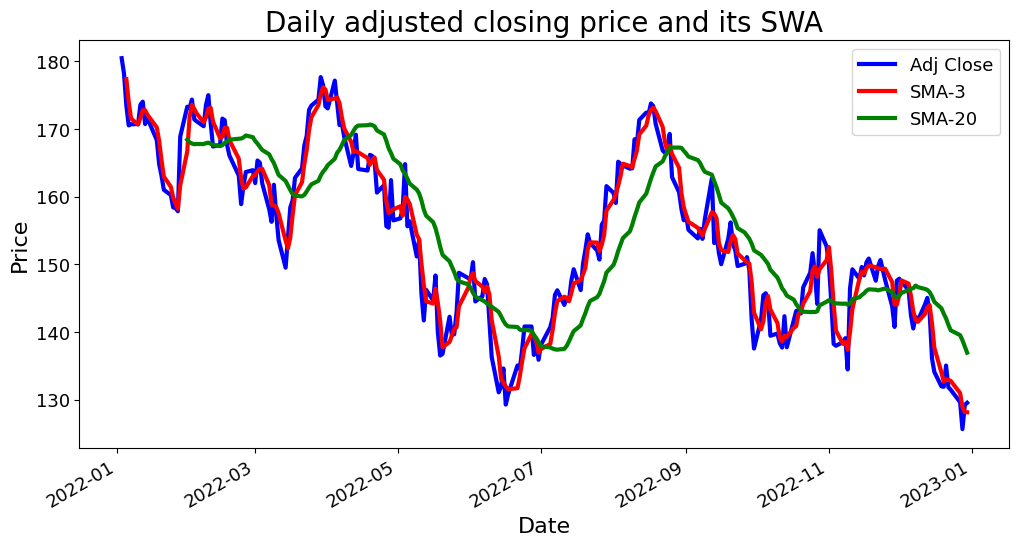

In [ ]:
# colors for the line plot
colors = ['blue', 'red', 'green']

# line plot for original price and SMA
df2.plot(color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(labels = colnames, fontsize=13)

# title and labels
plt.title('Daily adjusted closing price and its SWA', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)

# Exponential moving average

In [ ]:
alpha = 0.1
df2['EWM_'+str(alpha)] = df2['Adj Close'].ewm(alpha=alpha, adjust=False).mean()
df2.head()

<ipython-input-55-8fdc1bbd85cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['EWM_'+str(alpha)] = df2['Adj Close'].ewm(alpha=alpha, adjust=False).mean()


,Adj Close,SMA-3,SMA-20,EWM_0.1
Date,,,,
2022-01-03,180.434296,NaN,NaN,180.434296
2022-01-04,178.144302,NaN,NaN,180.205296
2022-01-05,173.405685,177.328094,NaN,179.525335
2022-01-06,170.510956,174.020315,NaN,178.623897
2022-01-07,170.679489,171.532043,NaN,177.829456


In [ ]:
alpha=0.1
alpha*df2['Adj Close'][1] + (1-alpha)*df2['Adj Close'][0]

180.2052963256836

In [ ]:
alpha = 0.5
df2['EWM_'+str(alpha)]= df2['Adj Close'].ewm(alpha=alpha, adjust=False).mean()
df2.head()

<ipython-input-57-14e9e4830588>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['EWM_'+str(alpha)]= df2['Adj Close'].ewm(alpha=alpha, adjust=False).mean()


,Adj Close,SMA-3,SMA-20,EWM_0.1,EWM_0.5
Date,,,,,
2022-01-03,180.434296,NaN,NaN,180.434296,180.434296
2022-01-04,178.144302,NaN,NaN,180.205296,179.289299
2022-01-05,173.405685,177.328094,NaN,179.525335,176.347492
2022-01-06,170.510956,174.020315,NaN,178.623897,173.429224
2022-01-07,170.679489,171.532043,NaN,177.829456,172.054357


Text(0, 0.5, 'Price')

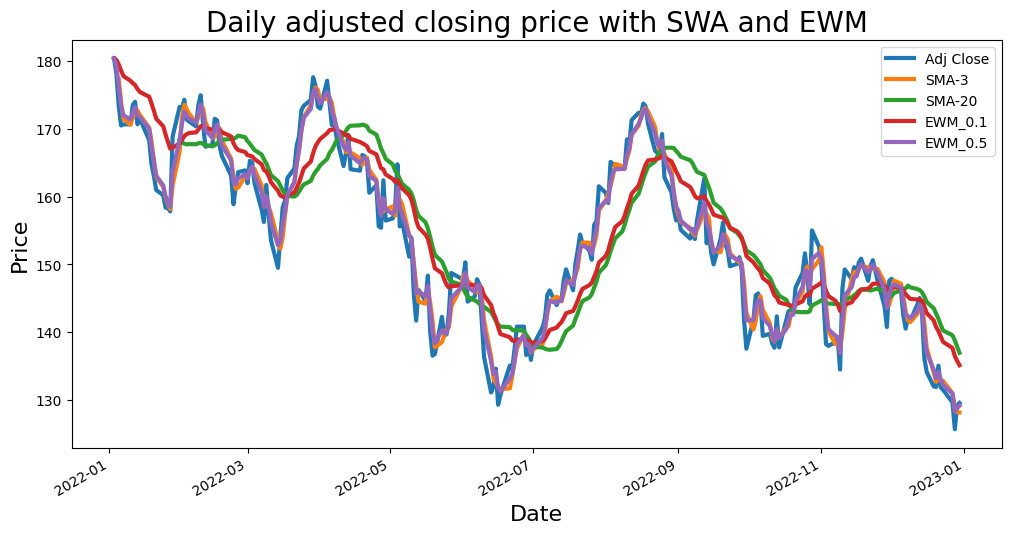

In [ ]:
df2.plot(linewidth=3, figsize=(12,6))
plt.title('Daily adjusted closing price with SWA and EWM', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)

# Implement trend following strategy

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-01-03 to 2022-12-30
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  251 non-null    float64
 1   SMA-3      249 non-null    float64
 2   SMA-20     232 non-null    float64
 3   EWM_0.1    251 non-null    float64
 4   EWM_0.5    251 non-null    float64
dtypes: float64(5)
memory usage: 11.8 KB


In [ ]:
df2.head()

,Adj Close,SMA-3,SMA-20,EWM_0.1,EWM_0.5
Date,,,,,
2022-01-03,180.434296,NaN,NaN,180.434296,180.434296
2022-01-04,178.144302,NaN,NaN,180.205296,179.289299
2022-01-05,173.405685,177.328094,NaN,179.525335,176.347492
2022-01-06,170.510956,174.020315,NaN,178.623897,173.429224
2022-01-07,170.679489,171.532043,NaN,177.829456,172.054357


In [ ]:
# Shift to the future by one day so that everyday uses the information up to 
# yesterday to make a trading decision for tmr
df2['SMA-3'] = df2['SMA-3'].shift(1)
df2['SMA-20'] = df2['SMA-20'].shift(1)

<ipython-input-61-9970b6364505>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['SMA-3'] = df2['SMA-3'].shift(1)
<ipython-input-61-9970b6364505>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['SMA-20'] = df2['SMA-20'].shift(1)


In [ ]:
# identify buy signal
df2['signal'] = np.where(df2['SMA-3'] > df2['SMA-20'], 1, 0)
# identify sell signal
df2['signal'] = np.where(df2['SMA-3'] < df2['SMA-20'], -1, df2['signal'])
df2.dropna(inplace=True)
df2.head()

<ipython-input-62-5affed7605c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['signal'] = np.where(df2['SMA-3'] > df2['SMA-20'], 1, 0)
<ipython-input-62-5affed7605c2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['signal'] = np.where(df2['SMA-3'] < df2['SMA-20'], -1, df2['signal'])
<ipython-input-62-5affed7605c2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

,Adj Close,SMA-3,SMA-20,EWM_0.1,EWM_0.5,signal
Date,,,,,,
2022-02-01,173.098358,166.654633,168.390970,168.382599,170.786155,-1
2022-02-02,174.317703,171.740219,168.024173,168.976109,172.551929,1
2022-02-03,171.403152,173.560984,167.832843,169.218814,171.977541,1
2022-02-04,171.115311,172.939738,167.732716,169.408463,171.546426,1
2022-02-07,170.390717,172.278722,167.762934,169.506689,170.968571,1


In [ ]:
# frequency counts
df2['signal'].value_counts()

-1    135
 1     96
Name: signal, dtype: int64

In [ ]:
# calculate instantaneous log return for buy-and-hold straetegy as benchmark
df2['log_return_buy_n_hold'] = np.log(df2['Adj Close']).diff()
df2.head()

<ipython-input-64-06adbde074ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['log_return_buy_n_hold'] = np.log(df2['Adj Close']).diff()


,Adj Close,SMA-3,SMA-20,EWM_0.1,EWM_0.5,signal,log_return_buy_n_hold
Date,,,,,,,
2022-02-01,173.098358,166.654633,168.390970,168.382599,170.786155,-1,NaN
2022-02-02,174.317703,171.740219,168.024173,168.976109,172.551929,1,0.007020
2022-02-03,171.403152,173.560984,167.832843,169.218814,171.977541,1,-0.016861
2022-02-04,171.115311,172.939738,167.732716,169.408463,171.546426,1,-0.001681
2022-02-07,170.390717,172.278722,167.762934,169.506689,170.968571,1,-0.004244


In [ ]:
# calculate instantaneous log return for trend following straetegy
df2['log_return_trend_follow'] = df2['signal'] * df2['log_return_buy_n_hold']
df2.head()

<ipython-input-65-6a737b8acb84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['log_return_trend_follow'] = df2['signal'] * df2['log_return_buy_n_hold']


,Adj Close,SMA-3,SMA-20,EWM_0.1,EWM_0.5,signal,log_return_buy_n_hold,log_return_trend_follow
Date,,,,,,,,
2022-02-01,173.098358,166.654633,168.390970,168.382599,170.786155,-1,NaN,NaN
2022-02-02,174.317703,171.740219,168.024173,168.976109,172.551929,1,0.007020,0.007020
2022-02-03,171.403152,173.560984,167.832843,169.218814,171.977541,1,-0.016861,-0.016861
2022-02-04,171.115311,172.939738,167.732716,169.408463,171.546426,1,-0.001681,-0.001681
2022-02-07,170.390717,172.278722,167.762934,169.506689,170.968571,1,-0.004244,-0.004244


In [ ]:
# derive trading action at each time step; 2 is buy, -2 is sell
df2['action'] = df2.signal.diff()
df2['action'].value_counts()

<ipython-input-66-9b0c36d5f3ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['action'] = df2.signal.diff()


 0.0    216
 2.0      7
-2.0      7
Name: action, dtype: int64

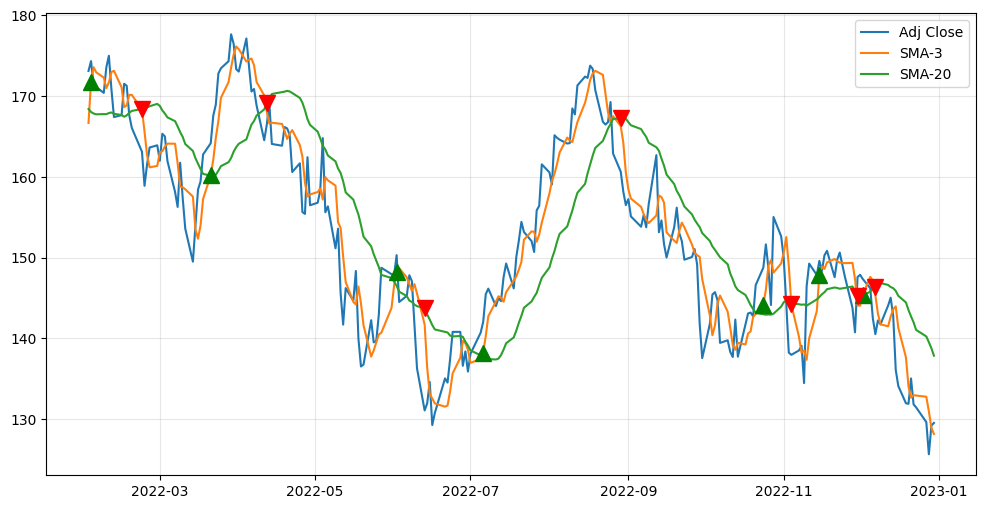

In [ ]:
# plot price series, SMAs, and trading actions
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(df2['Adj Close'], label = 'Adj Close')
plt.plot(df2['SMA-3'], label = 'SMA-3')
plt.plot(df2['SMA-20'], label = 'SMA-20')
plt.plot(df2.loc[df2.action == 2].index, df2['SMA-3'][df2.action == 2], '^',
         color = 'g', markersize = 12)
plt.plot(df2[df2.action == -2].index, df2['SMA-20'][df2.action == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=1);

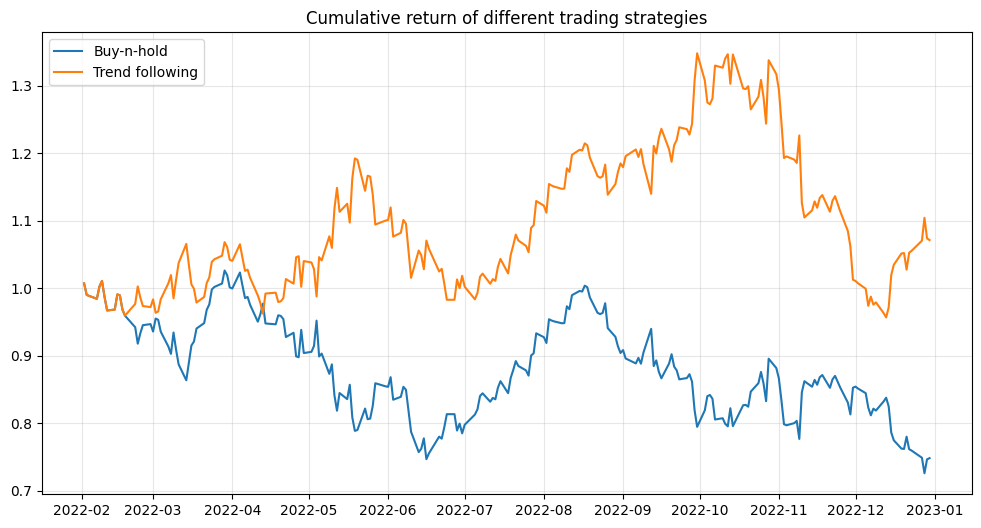

In [ ]:
# plot cumulative return
plt.plot(np.exp(df2['log_return_buy_n_hold']).cumprod(), label='Buy-n-hold')
plt.plot(np.exp(df2['log_return_trend_follow']).cumprod(), label='Trend following')
plt.legend(loc=2)
plt.title("Cumulative return of different trading strategies")
plt.grid(True, alpha=.3)

In [ ]:
# terminal return of buy-n-hold
np.exp(df2['log_return_buy_n_hold']).cumprod()[-1] -1

-0.25156586984649587

In [ ]:
# terminal return of trend following
np.exp(df2['log_return_trend_follow']).cumprod()[-1] -1

0.0711944903093773